<a href="https://colab.research.google.com/github/rubensgamaliel/CognitiveClass/blob/main/DatViz/Data_vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

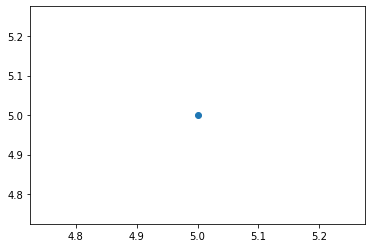

In [1]:
import matplotlib.pyplot as plt
plt.plot(5,5,'o')
plt.show()